In [2]:
import pandas as pd
import mplfinance as mpf
from typing import List


In [7]:
m1 = pd.read_csv('data/all_stock_2018_19_20.gzip', compression='gzip', index_col=0, parse_dates=[1])
m2 = pd.read_csv('data/all_stock_2015_17.gzip', compression='gzip', index_col=0, parse_dates=[1])
m3 = pd.read_csv('data/all_stock_2013_14.gzip', compression='gzip', index_col=0, parse_dates=[1])

m = pd.concat(
    [m1,m2,m3]
).sort_values('time').reset_index(
    drop=True
).rename(columns={'open': 'Open', 'close': 'Close', 'low': 'Low', 'high': 'High', 'volume': 'Volume'})

In [44]:
deliver = pd.read_csv('/home/lifx/workroom/jiaogedan.csv', dtype={'stock_code': str})
m = pd.read_parquet('/home/lifx/workroom/stock_price.parquet')
m.columns = ['time', 'stock_code', 'Low', 'High', 'Open', 'Close', 'tval', 'Volume']
m = m.sort_values(['stock_code', 'time'])

In [10]:
deliver.columns = ['time', 'stock_code', 'Low', 'High', 'Open', 'Close', 'tval', 'Volume']

In [42]:
# deliver..groupby(['dw_trade_date', 'stock_code', 'price']).agg({})
jiaoge = deliver.assign(
    buy_v = lambda x: x.buy_amount + x.cn_buy_amount + x.cc_buy_amount,
    sell_v = lambda x: x.sale_amount + x.cn_sale_amount + x.cc_sale_amount,
)

all_stock = deliver.stock_code.drop_duplicates().reset_index(drop=True)

In [61]:
deliver.loc[deliver.stock_code=='002234', :].assign(
    buy_balance=lambda x: x.price*(x.buy_amount+x.cn_buy_amount+x.cc_buy_amount),
    sell_balance=lambda x: x.price*(x.sale_amount+x.cn_sale_amount+x.cc_sale_amount),
)

,dw_trade_date,stock_code,stock_type,price,buy_amount,sale_amount,cn_buy_amount,cn_sale_amount,cc_buy_amount,cc_sale_amount,buy_balance,sell_balance
614,2018-05-25,002234,0,14.032,0,0,55400,0,0,0,777372.8,0.0
619,2018-05-28,002234,0,14.110,0,0,0,-55100,0,0,0.0,-777461.0
620,2018-05-28,002234,0,14.150,0,0,0,-300,0,0,0.0,-4245.0
1531,2019-03-08,002234,0,31.630,0,0,12800,0,0,0,404864.0,0.0
1534,2019-03-08,002234,0,31.674,0,0,10100,0,0,0,319907.4,0.0
1538,2019-03-11,002234,0,34.430,0,0,0,-22900,0,0,0.0,-788447.0
1548,2019-03-12,002234,0,38.796,0,0,17300,0,0,0,671170.8,0.0
1554,2019-03-13,002234,0,40.642,0,0,4700,0,0,0,191017.4,0.0
1556,2019-03-13,002234,0,40.996,0,0,15600,0,0,0,639537.6,0.0
1557,2019-03-13,002234,0,41.800,0,0,0,-17300,0,0,0.0,-723140.0


In [57]:
deliver.loc[deliver.stock_code=='002234', :].assign(
    buy_balance=lambda x: x.price*(x.buy_amount+x.cn_buy_amount+x.cc_buy_amount),
    sell_balance=lambda x: x.price*(x.sale_amount+x.cn_sale_amount+x.cc_sale_amount),
)

,dw_trade_date,stock_code,stock_type,price,buy_amount,sale_amount,cn_buy_amount,cn_sale_amount,cc_buy_amount,cc_sale_amount,buy_balance,sell_balance
614,2018-05-25,002234,0,14.032,0,0,55400,0,0,0,777372.8,0.0
619,2018-05-28,002234,0,14.110,0,0,0,-55100,0,0,0.0,-777461.0
620,2018-05-28,002234,0,14.150,0,0,0,-300,0,0,0.0,-4245.0
1531,2019-03-08,002234,0,31.630,0,0,12800,0,0,0,404864.0,0.0
1534,2019-03-08,002234,0,31.674,0,0,10100,0,0,0,319907.4,0.0
1538,2019-03-11,002234,0,34.430,0,0,0,-22900,0,0,0.0,-788447.0
1548,2019-03-12,002234,0,38.796,0,0,17300,0,0,0,671170.8,0.0
1554,2019-03-13,002234,0,40.642,0,0,4700,0,0,0,191017.4,0.0
1556,2019-03-13,002234,0,40.996,0,0,15600,0,0,0,639537.6,0.0
1557,2019-03-13,002234,0,41.800,0,0,0,-17300,0,0,0.0,-723140.0


In [52]:
all_stock.sample(20)

144    600489
364    000652
265    600633
336    002624
360    600804
266    600352
112    002234
76     300047
323    300223
15     002524
379    300661
175    300760
262    002938
183    300568
294    600010
214    002792
375    600598
115    603369
52     601766
359    600118
Name: stock_code, dtype: object

In [53]:
m.loc[m.stock_code=='002234', :].set_index('time').loc['2020-05-01':, :]

,stock_code,Low,High,Open,Close,tval,Volume
time,,,,,,,
2020-05-06,002234,23.36,24.34,23.45,24.23,1.509901e+08,6272741.0
2020-05-07,002234,24.01,24.67,24.36,24.38,1.479926e+08,6061218.0
2020-05-08,002234,23.86,24.30,24.30,24.09,1.671890e+08,6958809.0
2020-05-11,002234,23.87,24.29,23.95,23.98,1.161928e+08,4830304.0
2020-05-12,002234,23.80,24.06,23.91,23.98,8.406434e+07,3512053.0
2020-05-13,002234,23.95,24.65,24.00,24.48,1.574402e+08,6451423.0
2020-05-14,002234,23.82,24.34,24.34,23.85,1.220992e+08,5087342.0
2020-05-15,002234,23.55,24.13,23.83,23.61,9.662929e+07,4058406.0
2020-05-18,002234,23.02,23.90,23.63,23.83,1.035339e+08,4395875.0


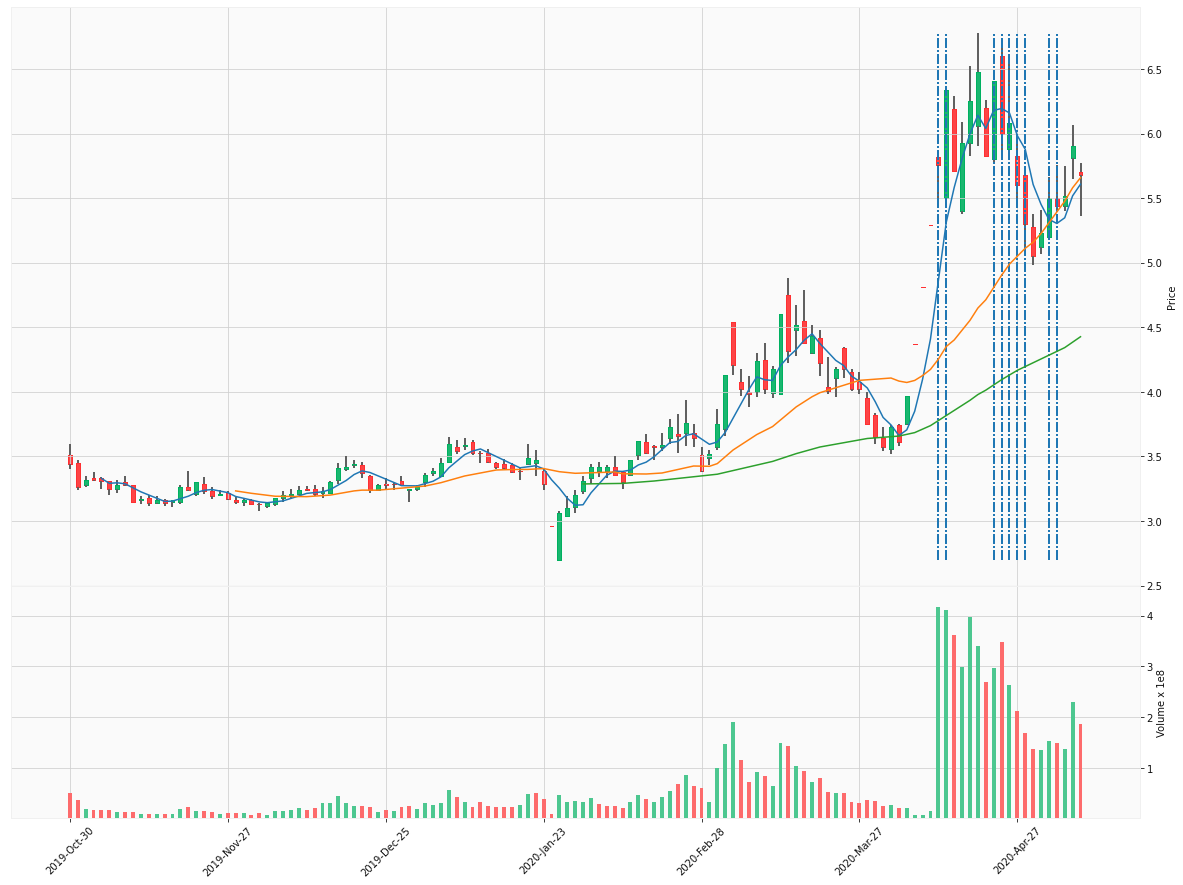

In [51]:
code = '002234'
a = jiaoge.loc[jiaoge.stock_code==code, :].apply(lambda x: Point(x.price, x.dw_trade_date), axis=1).values.tolist()
some_points(a, code)

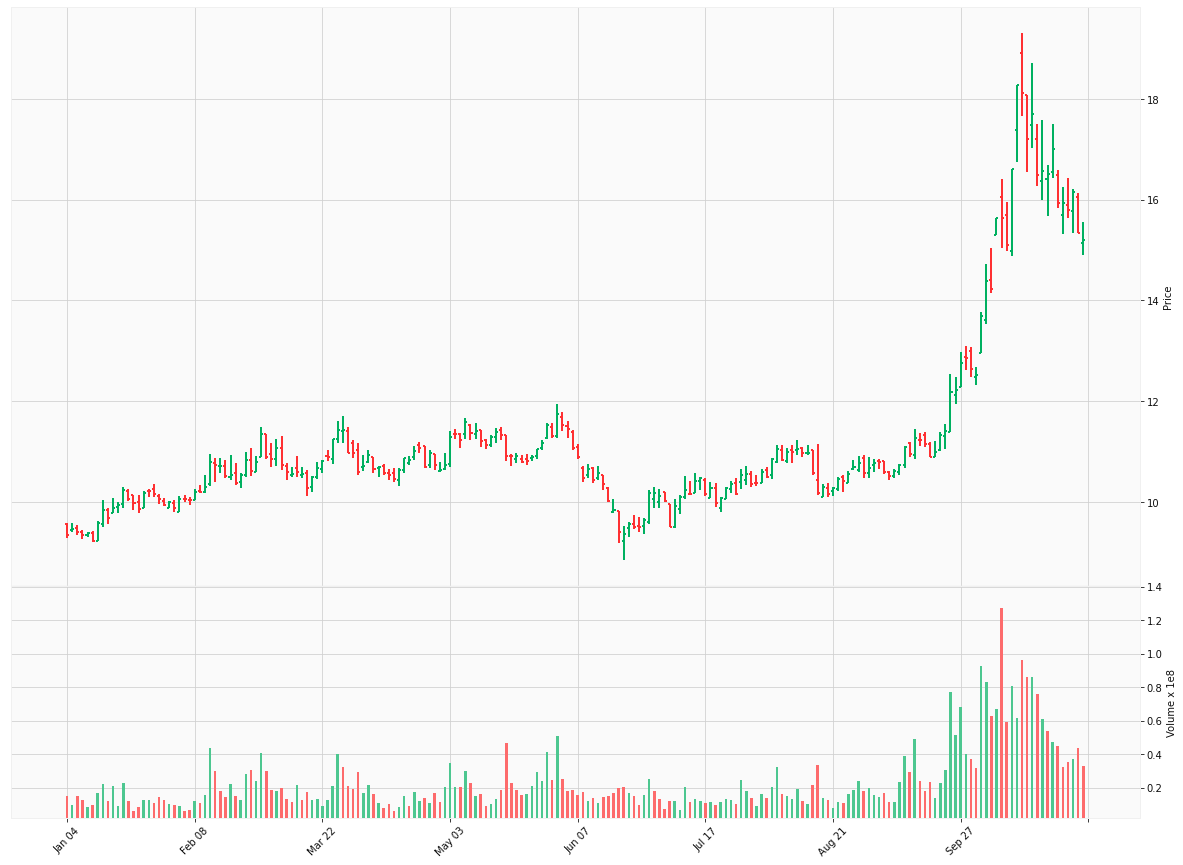

In [57]:
mpf.plot(
    m.loc[m.code=="600196.XSHG",['time', 'Open', 'Close', 'High', 'Low', 'Volume']].set_index('time').head(200),
    figscale=2.8,
    style='yahoo',
    volume=True,
    type='ohlc'
)

In [50]:
from typing import List
from collections import namedtuple
from dateutil.parser import parse
from datetime import timedelta

Point = namedtuple('Point', ['x', 'y'])
def some_points(points: List[Point], stock_code):
    xs, ys = list(zip(*points))
    max_date, min_date = parse(max(ys)), parse(min(ys))
    start = (min_date + timedelta(days=-166)).strftime("%Y-%m-%d")
    end = (max_date + timedelta(days=5)).strftime("%Y-%m-%d")
    
#     stock_code = f'{stock_code}.XSHG' if stock_code[0] in '6' else f'{stock_code}.XSHE'
    mpf.plot(
        m.loc[
            m.stock_code==stock_code,['time', 'Open', 'Close', 'High', 'Low', 'Volume']
        ].set_index('time').loc[start:end, :],
        figscale=2.8,
        type='candlestick',
        style='yahoo',
        volume=True,
#         hlines=dict(hlines=xs,linestyle='--'),
        vlines=dict(vlines=ys,linestyle='-.'),
        mav=(5, 22, 66, 132, 264)
    )
    
# some_points([Point(17, '2019-04-13')])

In [47]:
from dateutil.parser import parse
from datetime import timedelta
parse('2016-03-03') + timedelta(days=-20)

datetime.datetime(2016, 2, 12, 0, 0)